___
# Ciência dos Dados - PROJETO 1

## Gabriel Miras e Mariana Abrantes
___

## Aposentadoria brasileira

___
## Introdução

Para esse projeto escolhemos identificar qual o perfil do aposentado brasileiro através da leitura e análise dos dados. Ao final desse trabalho, devemos ter informações suficientes para estudar o posicionamento do aposentado, como quantas pessoas ainda são o responsável financeiro da família após se aposentar, ou quantas dessas pessoas ainda continuam com um emprego. Para um melhor estudo iremos filtrar os dados, escolhendo variáveis que achamos ser mais relevantes. Dentre todas as variáveis disponíveis, escolhemos estado onde a pessoa vive, o sexo, a idade, nível de escolaridade, se possui carteira assinada, cargo e rendimento. Temos que dar ênfase também no período em que a pesquisa está se referindo. Por exemplo, uma pessoa poderia estar desempregada três semanas antes da pesquisa ser realizada.


___
## Filtros da base de dados

In [80]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [81]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gabriel Miras\Documents\INSPER\3 SEMESTRE (DP)\C DADOS DP\Projetos\Projeto 1\DP-P1


In [82]:
#Se usar o arquivo descompactado
dados = pd.read_csv('PES2015.csv',sep=',')
dados
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

FileNotFoundError: File b'PES2015.csv' does not exist

In [83]:
_dados = dados[['UF', 'V0302','V8005', 'V0402', 'V0601', 'V9042', 'V9531', 'V9054',
                'V9060','V9077', 'V4743', 'V4745']]

A = _dados.rename(index = str, columns = {'UF': "ESTADO"})
B = A.rename(index = str, columns = {'V0302': "SEXO"})
C = B.rename(index = str, columns = {'V8005': "IDADE"})
D = C.rename(index = str, columns = {'V0402': "CONDICAO"})
E = D.rename(index = str, columns = {'V0601': "ALFABETIZACAO"})
F = E.rename(index = str, columns = {'V9042': "CARTEIRA"})
G = F.rename(index = str, columns = {'V9531': "PAGAMENTO"})
H = G.rename(index = str, columns = {'V9054': "ESTABELECIMENTO"})
I = H.rename(index = str, columns = {'V9060': "T_PREVIDENCIA"})
J = I.rename(index = str, columns = {'V9077': "TRABALHO"})
M = J.rename(index = str, columns = {'V4743': "SALARIO"})
N = M.rename(index = str, columns = {'V4745': "ESTUDO"})

N.head()

,ESTADO,SEXO,IDADE,CONDICAO,ALFABETIZACAO,CARTEIRA,PAGAMENTO,ESTABELECIMENTO,T_PREVIDENCIA,TRABALHO,SALARIO,ESTUDO
0,11,2,23,1,1,4.0,1.0,1.0,NaN,NaN,4.0,5
1,11,4,23,1,1,2.0,1.0,1.0,2.0,NaN,4.0,5
2,11,4,35,1,1,4.0,1.0,1.0,2.0,NaN,4.0,6
3,11,2,34,2,1,NaN,1.0,3.0,NaN,NaN,4.0,7
4,11,4,11,3,1,NaN,NaN,NaN,NaN,NaN,4.0,2


In [84]:
P = N[N['IDADE']>= 70]

P.SEXO = P.SEXO.astype('category')
P.SEXO.cat.categories = (['Masculino', 'Feminino'])

P.CONDICAO = P.CONDICAO.astype('category')
P.CONDICAO.cat.categories = (['Pessoa de referencia', 'Conjuge', 'Filho', 'Outro', 'Agregado', 'Pensionista', 'Empregado domestico', 'Parente do empregado domestico'])

P.ALFABETIZACAO = P.ALFABETIZACAO.astype('category')
P.ALFABETIZACAO.cat.categories = (['Sim', 'Nao'])

P.CARTEIRA = P.CARTEIRA.astype('category')
P.CARTEIRA.cat.categories = (['Sim', 'Nao'])

P.PAGAMENTO = P.PAGAMENTO.astype('category')
P.PAGAMENTO.cat.categories = (['Existia rendimento em dinheiro'])

P.ESTABELECIMENTO = P.ESTABELECIMENTO.astype('category')
P.ESTABELECIMENTO.cat.categories = (['Lojas, oficina, etc', 'fazenda, sitio etc', 'domicilio que trabalha',
                                     'domicilio de patrao etc', 'local designado pelo cliente etc', 'em veiculo motor', 'em via publica', 'outros' ])

P.T_PREVIDENCIA = P.T_PREVIDENCIA.astype('category')
P.T_PREVIDENCIA.cat.categories = (['Federal', 'Municipal', 'Estadual'])

P.TRABALHO = P.TRABALHO.astype('category')
P.TRABALHO.cat.categories = (['Empregado', 'Trabalhador domestico', 'Conta Propria', 'Empregador', 'Trabalhador nao remunerado na unidade domiciliar',
                             'outro trabalho nao remunerado', 'trabalhador no proprio negocio'])

P.SALARIO = P.SALARIO.astype('category')
P.SALARIO.cat.categories = (['Sem rendimento', 'Ate 1/4 de salario', 'mais de 1/4 ate 1/2 de salario', 'mais de 1/2 ate 1 de salario',
                               'mais de 1 ate 2 de salario', 'mais de 2 ate 3 de salario', 'mais de 3 ate 5 de salario', 'mais de 5 de salario',
                                'sem declaracao'])

P.ESTUDO = P.ESTUDO.astype('category')
P.ESTUDO.cat.categories = (['Sem instrucao', 'Fund. Incomp ou equivalente', 'Fund. compl ou equivalente', 'Med Incomp ou equivalente',
                            'Med compl ou equilavente', 'Sup Incompl ou equivalente', 'Superior completo', 'nao determinado'])

P.loc[(P.ESTADO>10)&(P.ESTADO<20), 'REGIAO'] = "Norte"
P.loc[(P.ESTADO>20)&(P.ESTADO<30), 'REGIAO'] = "Nordeste"
P.loc[(P.ESTADO>30)&(P.ESTADO<40), 'REGIAO'] = "Sudeste"
P.loc[(P.ESTADO>40)&(P.ESTADO<=50), 'REGIAO'] = "Sul"
P.loc[(P.ESTADO>=50)&(P.ESTADO<60), 'REGIAO'] = "Centro-Oeste"

P.head(10)

C:\Users\Gabriel Miras\Documents\INSPER\Programas Insper\AnacondaDownload\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Gabriel Miras\Documents\INSPER\Programas Insper\AnacondaDownload\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Gabriel Miras\Documents\INSPER\Programas Insper\AnacondaDownload\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A valu

,ESTADO,SEXO,IDADE,CONDICAO,ALFABETIZACAO,CARTEIRA,PAGAMENTO,ESTABELECIMENTO,T_PREVIDENCIA,TRABALHO,SALARIO,ESTUDO,REGIAO
9,11,Feminino,81,Outro,Sim,NaN,NaN,NaN,NaN,NaN,mais de 3 ate 5 de salario,Fund. Incomp ou equivalente,Norte
10,11,Feminino,71,Pessoa de referencia,Sim,NaN,NaN,NaN,NaN,NaN,mais de 2 ate 3 de salario,Fund. Incomp ou equivalente,Norte
118,11,Masculino,71,Pessoa de referencia,Nao,NaN,NaN,NaN,NaN,NaN,mais de 1/2 ate 1 de salario,Sem instrucao,Norte
131,11,Masculino,73,Pessoa de referencia,Sim,NaN,NaN,NaN,NaN,NaN,mais de 1 ate 2 de salario,Fund. Incomp ou equivalente,Norte
132,11,Feminino,71,Conjuge,Sim,NaN,NaN,NaN,NaN,NaN,mais de 1 ate 2 de salario,Fund. Incomp ou equivalente,Norte
182,11,Masculino,79,Pessoa de referencia,Sim,NaN,NaN,NaN,NaN,NaN,mais de 1/4 ate 1/2 de salario,Fund. Incomp ou equivalente,Norte
222,11,Feminino,91,Outro,Sim,NaN,NaN,NaN,NaN,NaN,mais de 1 ate 2 de salario,Fund. Incomp ou equivalente,Norte
241,11,Feminino,72,Outro,Nao,NaN,NaN,NaN,NaN,NaN,mais de 1/2 ate 1 de salario,Sem instrucao,Norte
248,11,Feminino,71,Outro,Sim,NaN,NaN,NaN,NaN,NaN,mais de 1/4 ate 1/2 de salario,Fund. Incomp ou equivalente,Norte
285,11,Masculino,73,Pessoa de referencia,Sim,NaN,NaN,NaN,NaN,NaN,mais de 1/2 ate 1 de salario,Sem instrucao,Norte


___
## Análise e Resultados

In [85]:
P.SALARIO.value_counts()

mais de 1/2 ate 1 de salario      8353
mais de 1 ate 2 de salario        6485
mais de 1/4 ate 1/2 de salario    1814
mais de 2 ate 3 de salario        1762
mais de 3 ate 5 de salario        1295
mais de 5 de salario              1102
sem declaracao                     522
Ate 1/4 de salario                 178
Sem rendimento                      21
Name: SALARIO, dtype: int64

In [86]:
CT = pd.crosstab(P.REGIAO, P.SALARIO, normalize = 'index')*100
CT

SALARIO,Sem rendimento,Ate 1/4 de salario,mais de 1/4 ate 1/2 de salario,mais de 1/2 ate 1 de salario,mais de 1 ate 2 de salario,mais de 2 ate 3 de salario,mais de 3 ate 5 de salario,mais de 5 de salario,sem declaracao
REGIAO,,,,,,,,,
Centro-Oeste,0.159405,0.265675,5.951116,36.291180,31.774708,8.554729,7.013815,7.757705,2.231668
Nordeste,0.080347,1.398040,12.453800,49.718785,23.589908,4.242327,3.663828,3.197815,1.655150
Norte,0.000000,1.660440,13.823163,46.284765,25.487754,5.479452,3.735990,1.826484,1.701951
Sudeste,0.150458,0.533443,6.127753,31.664615,33.401723,10.764601,7.427165,6.579127,3.351115
Sul,0.053952,0.188832,3.938495,30.914486,36.768276,11.275964,8.146749,6.258430,2.454815


C:\Users\Gabriel Miras\Documents\INSPER\Programas Insper\AnacondaDownload\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


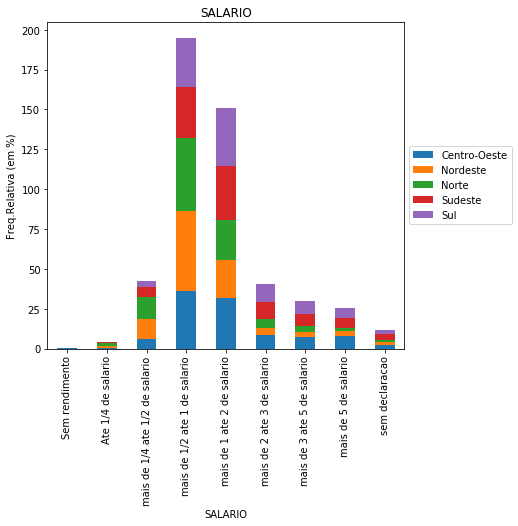

In [87]:
plot1 = CT.T.plot(kind='bar',stacked=True, title='SALARIO',figsize=(8,6))
plt.ylabel('Freq.Relativa (em %)') #nao sei se é freq relativa

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [88]:
P.T_PREVIDENCIA.value_counts()

Federal      404
Estadual      17
Municipal     13
Name: T_PREVIDENCIA, dtype: int64

In [89]:
CT2 = pd.crosstab(P.REGIAO, P.T_PREVIDENCIA, normalize = 'index')*100
CT2

T_PREVIDENCIA,Federal,Municipal,Estadual
REGIAO,,,
Centro-Oeste,90.000000,7.500000,2.500000
Nordeste,90.540541,2.702703,6.756757
Norte,84.210526,5.263158,10.526316
Sudeste,94.705882,2.352941,2.941176
Sul,96.428571,1.785714,1.785714


C:\Users\Gabriel Miras\Documents\INSPER\Programas Insper\AnacondaDownload\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


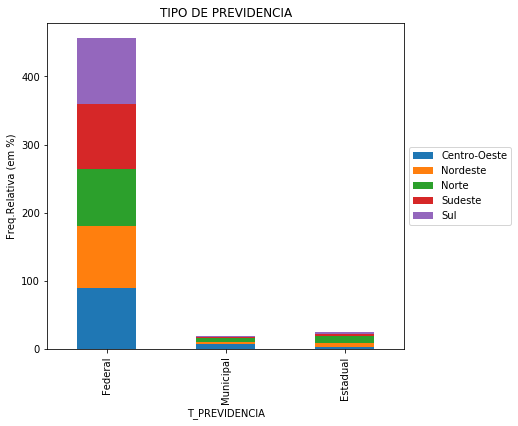

In [90]:
plot2 = CT2.T.plot(kind='bar',stacked=True, title='TIPO DE PREVIDENCIA',figsize=(8,6))
plt.ylabel('Freq.Relativa (em %)') #nao sei se é freq relativa

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [91]:
P.CONDICAO.value_counts()

Pessoa de referencia              14038
Conjuge                            4215
Outro                              3153
Agregado                            104
Pensionista                          26
Filho                                22
Empregado domestico                   8
Parente do empregado domestico        1
Name: CONDICAO, dtype: int64

In [92]:
CT3 = pd.crosstab(P.REGIAO, P.CONDICAO, normalize = 'index')*100
CT3

CONDICAO,Pessoa de referencia,Conjuge,Filho,Outro,Agregado,Pensionista,Empregado domestico,Parente do empregado domestico
REGIAO,,,,,,,,
Centro-Oeste,65.588547,19.724284,0.053022,13.891835,0.530223,0.159067,0.053022,0.00000
Nordeste,65.271094,19.249278,0.176452,14.629451,0.497273,0.128329,0.048123,0.00000
Norte,63.971808,19.029851,0.041459,16.127695,0.704809,0.124378,0.000000,0.00000
Sudeste,65.424515,19.601420,0.081900,14.359814,0.327600,0.136500,0.054600,0.01365
Sul,64.599623,20.167161,0.080884,14.505257,0.593152,0.053923,0.000000,0.00000


C:\Users\Gabriel Miras\Documents\INSPER\Programas Insper\AnacondaDownload\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


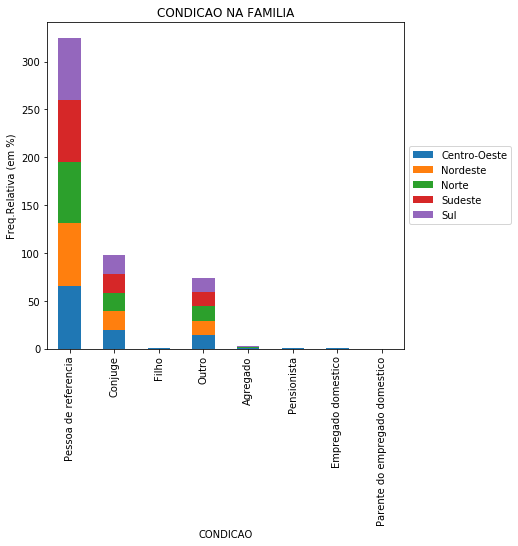

In [93]:
plot3 = CT3.T.plot(kind='bar',stacked=True, title='CONDICAO NA FAMILIA' ,figsize=(8,6))
plt.ylabel('Freq.Relativa (em %)') #nao sei se é freq relativa

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [94]:
P.ESTUDO.value_counts()

Fund. Incomp ou equivalente    9571
Sem instrucao                  7310
Med compl ou equilavente       1813
Fund. compl ou equivalente     1313
Superior completo              1285
Med Incomp ou equivalente       174
Sup Incompl ou equivalente       94
nao determinado                   7
Name: ESTUDO, dtype: int64

In [95]:
CT4 = pd.crosstab(P.REGIAO, P.ESTUDO, normalize = 'index')*100
CT4

ESTUDO,Sem instrucao,Fund. Incomp ou equivalente,Fund. compl ou equivalente,Med Incomp ou equivalente,Med compl ou equilavente,Sup Incompl ou equivalente,Superior completo,nao determinado
REGIAO,,,,,,,,
Centro-Oeste,36.267232,42.364793,5.567338,0.742312,7.847296,0.371156,6.839873,0.000000
Nordeste,48.155278,35.097850,4.363170,0.673725,7.362849,0.240616,4.042348,0.064164
Norte,41.998342,40.671642,5.721393,0.995025,8.043118,0.165837,2.404643,0.000000
Sudeste,24.256074,48.375648,7.821458,0.832651,10.169260,0.586951,7.944308,0.013650
Sul,22.485845,55.513616,6.066325,0.889728,7.198706,0.674036,7.117822,0.053923


C:\Users\Gabriel Miras\Documents\INSPER\Programas Insper\AnacondaDownload\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


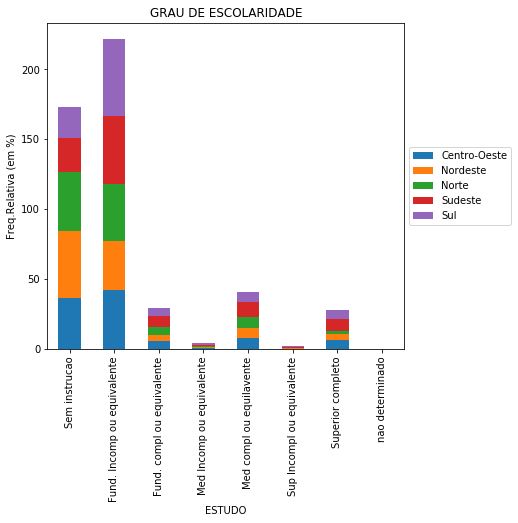

In [96]:
plot4 = CT4.T.plot(kind='bar',stacked=True, title='GRAU DE ESCOLARIDADE' ,figsize=(8,6))
plt.ylabel('Freq.Relativa (em %)') #nao sei se é freq relativa

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [97]:
P.SEXO.value_counts()

Feminino     12376
Masculino     9191
Name: SEXO, dtype: int64

In [98]:
CT5 = pd.crosstab(P.REGIAO, P.SEXO, normalize = 'index')*100
CT5

SEXO,Masculino,Feminino
REGIAO,,
Centro-Oeste,45.811241,54.188759
Nordeste,42.171960,57.828040
Norte,47.761194,52.238806
Sudeste,40.950041,59.049959
Sul,41.682394,58.317606


C:\Users\Gabriel Miras\Documents\INSPER\Programas Insper\AnacondaDownload\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


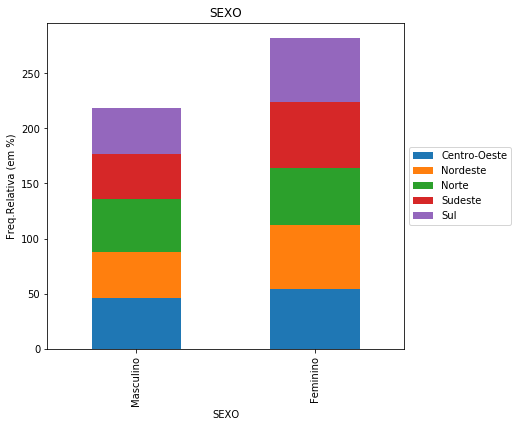

In [99]:
plot5 = CT5.T.plot(kind='bar',stacked=True, title='SEXO' ,figsize=(8,6))
plt.ylabel('Freq.Relativa (em %)') #nao sei se é freq relativa

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [100]:
CTv = pd.crosstab(P.SALARIO, P.CONDICAO, normalize = 'index')*100
CTv

CONDICAO,Pessoa de referencia,Conjuge,Filho,Outro,Agregado,Pensionista,Empregado domestico,Parente do empregado domestico
SALARIO,,,,,,,,
Sem rendimento,85.714286,9.523810,0.000000,4.761905,0.000000,0.0,0.0,0.0
Ate 1/4 de salario,62.359551,10.112360,0.000000,26.404494,1.123596,0.0,0.0,0.0
mais de 1/4 ate 1/2 de salario,63.561191,17.805954,0.055127,18.246968,0.330761,0.0,0.0,0.0
mais de 1/2 ate 1 de salario,66.275590,21.477314,0.107746,11.696397,0.442955,0.0,0.0,0.0
mais de 1 ate 2 de salario,64.425598,18.920586,0.107941,15.990748,0.555127,0.0,0.0,0.0
mais de 2 ate 3 de salario,63.507378,17.650397,0.170261,18.274688,0.397276,0.0,0.0,0.0
mais de 3 ate 5 de salario,64.169884,17.760618,0.154440,17.297297,0.617761,0.0,0.0,0.0
mais de 5 de salario,69.419238,18.511797,0.000000,11.705989,0.362976,0.0,0.0,0.0
sem declaracao,62.643678,20.306513,0.000000,16.283525,0.766284,0.0,0.0,0.0


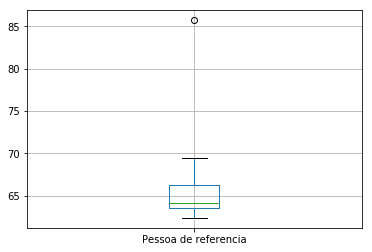

In [101]:
CTv.boxplot(column=['Pessoa de referencia'])

C:\Users\Gabriel Miras\Documents\INSPER\Programas Insper\AnacondaDownload\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


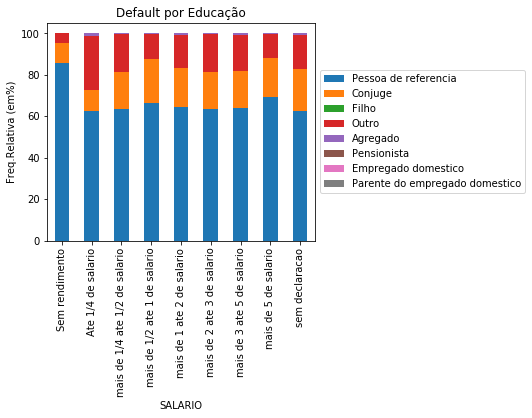

In [102]:
plot = CTv.plot(kind='bar', stacked=True,title='Default por Educação')
plt.ylabel('Freq.Relativa (em%)')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

___
## Conclusão 

Descreva aqui suas conclusões!